<a href="https://colab.research.google.com/github/pravincoder/Fundamentals_tensorflow/blob/main/Neural_Network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Regression 
### Whats to cover in this notebook?
* Architecture of neural network regression model.
* Input/Output shapes of regression model.
* Creating custom data to view and fit. 
* (Modeling) Creating a model,compiling,fitting and evaluating the model.
* Different evaluation method
* (IMP) Saving and loading a model

# Introduction to Regression with Neural Network in Tensorflow

 The simple defination is prediction of the numerial value based on various combinations of variables (both relational and non-realtional) .



In [ ]:
# import tensorflow , numpy,matplotlib.pyplot
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Create features
X = np.array([-7.0,-4.0,-1.0,2.,3.,4.,6.,8.,11.0,14.])
Y = np.array([2.0,5.0,8.0,11.0,12.,13.,15.,17.,20.,23.])

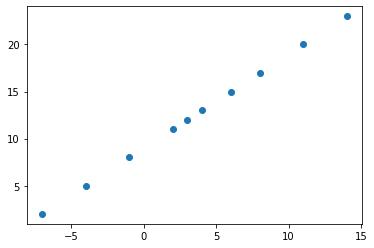

In [ ]:
# Visual the data
plt.scatter(X,Y)

In [ ]:
Y == X+9

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

# Input and Output Shape

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info=tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([934000])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([934000], dtype=int32)>)

In [ ]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape,output_shape

((), ())

In [ ]:
X[0].ndim # Given input is a numpy array not a tensor

0

In [ ]:
X,Y

(array([-7., -4., -1.,  2.,  3.,  4.,  6.,  8., 11., 14.]),
 array([ 2.,  5.,  8., 11., 12., 13., 15., 17., 20., 23.]))

In [ ]:
# Turn our Numpy array to Tensor
X= tf.constant(X)
Y= tf.constant(Y)

X = tf.cast(X,dtype=tf.float32)
Y = tf.cast(Y,dtype=tf.float32)
X.shape,Y.shape

(TensorShape([10]), TensorShape([10]))

# Steps in Modeling with Tensorflow

* **Creating a Model** - define the input and output layers, as well as the hidden layers of the deep learning model.
* **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the Optimizer(tells our model how to improve in reading the patterns) and evaluation metrics (what we can use to interpret the preformance of our model).
* **Fitting a Model** - letting the model try to find the pattern btw Features and Label(X & Y).

In [ ]:
# Set Random Seed
tf.random.set_seed(42)

# Create a model using Sequential API
model= tf.keras.Sequential([ tf.keras.layers.Dense(1,input_shape=(1,))])

# Compile the model
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# Fit the model
model.fit(X,Y,epochs=5)


Epoch 1/5
1/1 [==============================] - 0s 451ms/step - loss: 8.2220 - mae: 8.2220
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 8.0824 - mae: 8.0824
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 7.9428 - mae: 7.9428
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 7.8032 - mae: 7.8032
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 7.6636 - mae: 7.6636


In [ ]:
# try and make prediction
model.predict([17.0])
# output should be 17+9=26 

1/1 [==============================] - 0s 256ms/step


array([[23.783852]], dtype=float32)

# Improve our Model

We can improve our model , by altering the steps we took to create a model

* **Creating the Model** - we might add more layers,increase the number of hidden units (all called neurons) within each of the hidden layers,change the activation function of each layer

* **Compiling a Model** - we should try changing the optimization function or perhaps the **learning rate** of the Optimization function.

* **Fitting a Model** - we might fit the model for more **epochs** (leave it training for longer)  or on more data. 

In [ ]:
# Just increasing the epochs to 100 that is 10x and checking the model prediction
# Create a model using Sequential API
model2= tf.keras.Sequential([ tf.keras.layers.Dense(1,input_shape=(1,))])

# Compile the model
model2.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# Fit the model
model2.fit(X,Y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 290ms/step - loss: 13.3920 - mae: 13.3920
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 13.2524 - mae: 13.2524
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 13.1128 - mae: 13.1128
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 12.9732 - mae: 12.9732
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 12.8336 - mae: 12.8336
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 12.6940 - mae: 12.6940
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 12.5544 - mae: 12.5544
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 12.4148 - mae: 12.4148
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 12.2752 - mae: 12.2752
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 12.1356 - mae: 12.1356
Epoch 11/100
1/1 [==============================] - 0s 8m

In [ ]:
# Check the prediction of model2
model2.predict([17.0])

1/1 [==============================] - 0s 63ms/step


array([[30.525969]], dtype=float32)

# Creating a Larger Model

In [ ]:
# improved Model by increasing the dense.layers
# Only increased the dense layers and neurons with increase in epochs
# Set Random Seed
tf.random.set_seed(42)

# Create a model using Sequential API
model3= tf.keras.Sequential([ tf.keras.layers.Dense(1,input_shape=(1,)),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)])

# Compile the model
model3.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# Fit the model
model3.fit(X,Y,epochs=150)


Epoch 1/150
1/1 [==============================] - 0s 492ms/step - loss: 12.3832 - mae: 12.3832
Epoch 2/150
1/1 [==============================] - 0s 9ms/step - loss: 12.1514 - mae: 12.1514
Epoch 3/150
1/1 [==============================] - 0s 9ms/step - loss: 11.9332 - mae: 11.9332
Epoch 4/150
1/1 [==============================] - 0s 10ms/step - loss: 11.7055 - mae: 11.7055
Epoch 5/150
1/1 [==============================] - 0s 9ms/step - loss: 11.4572 - mae: 11.4572
Epoch 6/150
1/1 [==============================] - 0s 8ms/step - loss: 11.1806 - mae: 11.1806
Epoch 7/150
1/1 [==============================] - 0s 8ms/step - loss: 10.8620 - mae: 10.8620
Epoch 8/150
1/1 [==============================] - 0s 9ms/step - loss: 10.4914 - mae: 10.4914
Epoch 9/150
1/1 [==============================] - 0s 10ms/step - loss: 10.0505 - mae: 10.0505
Epoch 10/150
1/1 [==============================] - 0s 10ms/step - loss: 9.5249 - mae: 9.5249
Epoch 11/150
1/1 [==============================] - 0s 9

In [ ]:
# try and make prediction with model3
model3.predict([17.0])
# output should be 17+9=26 

1/1 [==============================] - 0s 100ms/step


array([[24.443985]], dtype=float32)

In [ ]:
# increased the epochs
# increased the dense layer (10,20,10)
# Changed the optimizer to experimental.AdamW check more optimizer on tf/optimizers
tf.random.set_seed(42)

# Create a model using Sequential API
model4= tf.keras.Sequential([ tf.keras.layers.Dense(1,input_shape=(1,)),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)])

# Compile the model
model4.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.experimental.AdamW(),
              metrics=['mae'])

# Fit the model
model4.fit(X,Y,epochs=300)

Epoch 1/300
1/1 [==============================] - 1s 1s/step - loss: 12.6447 - mae: 12.6447
Epoch 2/300
1/1 [==============================] - 0s 9ms/step - loss: 12.6260 - mae: 12.6260
Epoch 3/300
1/1 [==============================] - 0s 11ms/step - loss: 12.6075 - mae: 12.6075
Epoch 4/300
1/1 [==============================] - 0s 10ms/step - loss: 12.5892 - mae: 12.5892
Epoch 5/300
1/1 [==============================] - 0s 9ms/step - loss: 12.5711 - mae: 12.5711
Epoch 6/300
1/1 [==============================] - 0s 9ms/step - loss: 12.5535 - mae: 12.5535
Epoch 7/300
1/1 [==============================] - 0s 10ms/step - loss: 12.5362 - mae: 12.5362
Epoch 8/300
1/1 [==============================] - 0s 9ms/step - loss: 12.5193 - mae: 12.5193
Epoch 9/300
1/1 [==============================] - 0s 9ms/step - loss: 12.5028 - mae: 12.5028
Epoch 10/300
1/1 [==============================] - 0s 12ms/step - loss: 12.4869 - mae: 12.4869
Epoch 11/300
1/1 [==============================] - 0s 8

In [ ]:
# make Predictions
print(model4.predict([17.0]))
# 17+9 =26 perfect model with loss=0.09 
# here is the most appropreate model after 4 model
print(model4.predict([20.0]))
# try on given data

print(model4.predict(X[6:7].numpy()))

1/1 [==============================] - 0s 38ms/step
[[26.171309]]
1/1 [==============================] - 0s 39ms/step
[[29.223642]]
1/1 [==============================] - 0s 20ms/step
[[14.979431]]


# Evaluation of models

### Typical WorkFlow of any Neural Network Model 

```
Build a model --> fit it --> evaluate it --> tweak it --> fit again -->tweak .... so on until you get a satisfied result. 
```

### But when Evaluating a model we only use,

* `Visualization`

## Reasons for Visualization 

* `Data` - what data are we working on ? , what does it look like?
* `Model` - what should our model look like?
* `Traning ` - how does a model perform while it learns?
* `Prediction` - how do the prediction of the model line up against the ground truth(The original Labels)? (Used in above model for X=17, then Y =26).          

In [154]:
# Make a bigger dataset
X = tf.range(-100, 200, 5)
X

<tf.Tensor: shape=(60,), dtype=int32, numpy=
array([-100,  -95,  -90,  -85,  -80,  -75,  -70,  -65,  -60,  -55,  -50,
        -45,  -40,  -35,  -30,  -25,  -20,  -15,  -10,   -5,    0,    5,
         10,   15,   20,   25,   30,   35,   40,   45,   50,   55,   60,
         65,   70,   75,   80,   85,   90,   95,  100,  105,  110,  115,
        120,  125,  130,  135,  140,  145,  150,  155,  160,  165,  170,
        175,  180,  185,  190,  195], dtype=int32)>

In [155]:
y = X + 10
y

<tf.Tensor: shape=(60,), dtype=int32, numpy=
array([-90, -85, -80, -75, -70, -65, -60, -55, -50, -45, -40, -35, -30,
       -25, -20, -15, -10,  -5,   0,   5,  10,  15,  20,  25,  30,  35,
        40,  45,  50,  55,  60,  65,  70,  75,  80,  85,  90,  95, 100,
       105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165,
       170, 175, 180, 185, 190, 195, 200, 205], dtype=int32)>

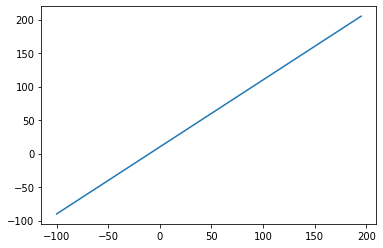

In [157]:
import matplotlib.pyplot as plt

plt.plot(X, y)

## Typical split of any DataSet
 * **Training Set** - the model learns from this data, which is typically 70-80% of the total data you have available
 * **Validation Set** - the model gets tuned on this data, which is typically 10-15% of the data available.
 * **Testing Set**- the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [160]:
# Split the data into train and test sets
X_train = X[:45] # first 40 are training samples (80% of the data) 
y_train = y[:45]

X_test = X[45:] # last 10 are testing samples (20% of the data)
y_test = y[45:]

len(X_train), len(X_test), len(y_train), len(y_test)

(45, 15, 45, 15)

# Visualizing the different set of data
Now we've got our data in training and test sets... let's visualize it again!

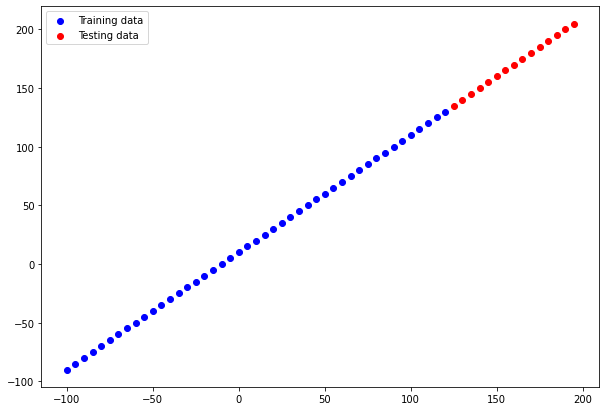

In [162]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data") # our model will learn on this
# Plot test data in green
plt.scatter(X_test, y_test, c="r", label="Testing data") # want our model to be able to predict this (given X, what's y?)
# Show a legend
plt.legend();
     

In [221]:

# Let's have a look at how to build a neural network for our data

# 1. Create a model
model5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1,input_shape=(1,),name='Input_layer'),
  tf.keras.layers.Dense(90,activation='relu',name="Dense_l1"),
  tf.keras.layers.Dense(180,activation='relu',name="Dense_l2"),
  tf.keras.layers.Dense(90,activation='relu',name="Dense_l3"),
  tf.keras.layers.Dense(1,name='Output_layer')                             
],name="Model_5")

# 2. Compile the model
model5.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.experimental.AdamW(),
              metrics=["mae"])

# # 3. Fit the model
model5.fit(X_train, y_train, epochs=170)

Epoch 1/170
2/2 [==============================] - 2s 12ms/step - loss: 57.5864 - mae: 57.5864
Epoch 2/170
2/2 [==============================] - 0s 10ms/step - loss: 56.9170 - mae: 56.9170
Epoch 3/170
2/2 [==============================] - 0s 11ms/step - loss: 56.2751 - mae: 56.2751
Epoch 4/170
2/2 [==============================] - 0s 11ms/step - loss: 55.6386 - mae: 55.6386
Epoch 5/170
2/2 [==============================] - 0s 10ms/step - loss: 54.9262 - mae: 54.9262
Epoch 6/170
2/2 [==============================] - 0s 10ms/step - loss: 54.0999 - mae: 54.0999
Epoch 7/170
2/2 [==============================] - 0s 9ms/step - loss: 53.1310 - mae: 53.1310
Epoch 8/170
2/2 [==============================] - 0s 8ms/step - loss: 52.0460 - mae: 52.0460
Epoch 9/170
2/2 [==============================] - 0s 8ms/step - loss: 50.7751 - mae: 50.7751
Epoch 10/170
2/2 [==============================] - 0s 9ms/step - loss: 49.2938 - mae: 49.2938
Epoch 11/170
2/2 [==============================] - 0

In [212]:
model5.summary()

Model: "Model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 1)                 2         
                                                                 
 Dense_l1 (Dense)            (None, 90)                180       
                                                                 
 Dense_l2 (Dense)            (None, 180)               16380     
                                                                 
 Dense_l3 (Dense)            (None, 90)                16290     
                                                                 
 Output_layer (Dense)        (None, 1)                 91        
                                                                 
Total params: 32,943
Trainable params: 32,943
Non-trainable params: 0
_________________________________________________________________


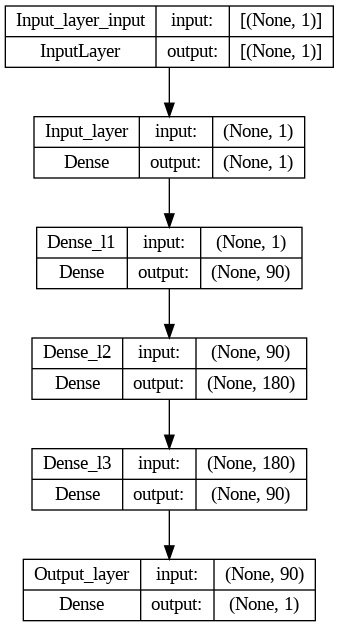

In [213]:
from tensorflow.keras.utils import plot_model
plot_model(model=model5,show_shapes=True,to_file='molel.png')

# Visualizing our model's predictions
To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test or y_true versus y_pred (ground truth versus your model's predictions).

In [222]:
y_pred = model5.predict(X_test)
y_pred,y_test

1/1 [==============================] - 0s 76ms/step


(array([[136.1537 ],
        [141.20317],
        [146.25264],
        [151.3021 ],
        [156.35155],
        [161.40102],
        [166.45045],
        [171.49992],
        [176.54938],
        [181.59883],
        [186.6483 ],
        [191.69777],
        [196.74721],
        [201.79668],
        [206.84615]], dtype=float32),
 <tf.Tensor: shape=(15,), dtype=int32, numpy=
 array([135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195,
        200, 205], dtype=int32)>)

# Let's create a Ploting function

If we want to use a functionality many time it better to create a function.






In [228]:
# Plotting function
def plot_predict(train_data=X_train,test_data=X_test,train_label=y_train,test_label=y_test,predict = y_pred):
  """Plots training data, ,test data and compares predictions to ground Truth labels."""
  plt.figure(figsize=(10,7))
  #plot the training data in blue
  plt.scatter(train_data,train_label,c='b',label='Training data')
  #plot the testing data in red
  plt.scatter(test_data,test_label,c='r',label='Testing Data')
  #plot the model prediction in green
  plt.scatter(test_data,predict,c='g',label="Prediction",marker='^')
  #plot the legend
  plt.legend();

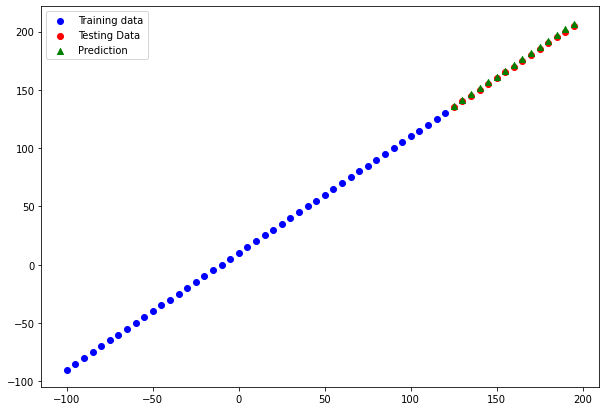

In [229]:
plot_predict(train_data=X_train,test_data=X_test,train_label=y_train,test_label=y_test,predict = y_pred)

# Evaluating our models prediction with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:

* **MAE**- mean absolute error, "on average, how wrong is each of my model's predictions"
* **MSE**- mean square error, "square the average errors"

In [230]:
model5.evaluate(X_test,y_test)

1/1 [==============================] - 0s 251ms/step - loss: 1.4999 - mae: 1.4999


[1.4999247789382935, 1.4999247789382935]

In [233]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test,tf.constant(y_pred))
mae

<tf.Tensor: shape=(15,), dtype=float32, numpy=
array([34.000126, 29.784342, 26.248415, 23.392357, 21.21615 , 19.719795,
       18.903303, 18.766663, 19.309875, 20.532942, 22.435873, 25.01866 ,
       28.281286, 32.22379 , 36.846146], dtype=float32)>

In [236]:
# differnet shape so we are getting such big value
y_prediction = tf.squeeze(y_pred)
y_prediction,y_test

(<tf.Tensor: shape=(15,), dtype=float32, numpy=
 array([136.1537 , 141.20317, 146.25264, 151.3021 , 156.35155, 161.40102,
        166.45045, 171.49992, 176.54938, 181.59883, 186.6483 , 191.69777,
        196.74721, 201.79668, 206.84615], dtype=float32)>,
 <tf.Tensor: shape=(15,), dtype=int32, numpy=
 array([135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195,
        200, 205], dtype=int32)>)

In [237]:
# ReCalculating the mean absolute error
mae = tf.keras.losses.mean_absolute_error(y_test,y_prediction)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.4999237>

In [238]:
# Calucate the mean square error
mse = tf.metrics.mean_squared_error(y_test,y_prediction)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=2.295433>

# Tips to improve any model

1. `More Data` - get more examples for your model to train on(more opportunities to learn patttern or relationships btw features and labels).
2. `Enlarge your Model` - (using complex model) this includes increasing different layers,hidden layers or more hidden units in each layer.
3. `Train longer` - give your model more of a chance to find patterns in data.


# Tracking Your Experiments 

**Tip💁‍♂️**

* `TensorBoard` - a component of the tensorflow library to help track modelling experiments (Future).
* `Weight & Biases` -  a tool for tracking all kinds of machine learning experiments(plugs striaght into tensorboard).

## Saving Model

Saving our model for using it anywhere we want to use or model in web or app etc.

There are to different format to save a model format.

1.The SavedModel format.

2.The HDF5 format.


In [239]:
# Saving the model using SavedModel format
model5.save('First model with 0.9 acc')

In [240]:
# save the model using HDF5 fromat
model5.save('First_model_0.9acc.h5')

# Loading in a saved Model


In [242]:
# loading the SavedModel format
loaded_SavedModel = tf.keras.models.load_model('First model with 0.9 acc')
loaded_SavedModel.predict([120])


1/1 [==============================] - 0s 116ms/step


array([[131.10426]], dtype=float32)

In [243]:
# Compare model5 with the loaded model as weight are also saved
model5_pred = model5.predict(X_test)
loadedModel_pred = loaded_SavedModel(X_test)
model5_pred == loadedModel_pred

1/1 [==============================] - 0s 46ms/step


<tf.Tensor: shape=(15, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])>